In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

sns.set_theme(context='talk', 
              style='whitegrid', 
              palette='Set2',
              font_scale=1.4, 
              rc={'figure.figsize': (14, 6)})

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly
pio.templates.default = 'plotly_white+presentation'



import scipy.optimize
import scipy.constants as sc

hbarc = sc.hbar*sc.speed_of_light/sc.giga/sc.electron_volt / sc.femto

from scipy.interpolate import InterpolatedUnivariateSpline


import json
import os
import glob

import sys
sys.path.append('../src')
from luscher_lib import Luscher_zeta, Kcot_luscher

from tqdm import tqdm

# preprocessing Fig. 5

In [14]:
# set origins
# 0 -> 89.2086, 1.5 -> 226.495
conv_x = lambda x: 0 + 1.5 * (x - 89.2086) / (226.495 - 89.2086)
# -0.5 -> 169.105, 3.0 -> 9.141
conv_y = lambda y: -0.5 + (3.0 + 0.5) * (y - 169.105) / (9.141 - 169.105)

# -0.2 -> 82.3441, 0.2 -> 147.719
conv_x2 = lambda x: -0.2 + (0.2 + 0.2) * (x - 82.3441) / (147.719 - 82.3441)
# -0.4 -> 72.096, 0.0 -> 20.599
conv_y2 = lambda y: -0.4 + (0.0 + 0.4) * (y - 72.096) / (20.599 - 72.096)

In [20]:
np.array([[1, 2],
[2,3],
[4,5]]).mean(axis=0)

array([2.33333333, 3.33333333])

In [53]:
raw_data_a0099 = {
    'P001_1': {
        'xy': np.array([
            [223.06, 84.38],
            [220.68, 89.32],
            [226.14, 88.91]
        ]).mean(axis=0),
        'xys': np.array([
            [220.9, 93.26],
            [223.28, 87.56],
            [225.55, 81.56],
            [225.68, 81.18]
        ])
    },
    'P000_1': {
        'xy': np.array([
            [191.72, 96.8],
            [189.05, 101.58],
            [194.52, 101.5]
        ]).mean(axis=0),
        'xys': np.array([
            [189.37, 104.88],
            [191.73, 100.02],
            [193.98, 94.9],
            [194.16, 94.46]
        ])
    },
    'P111_0': {
        'xy': np.array([
            [107.49, 148.78],
            [112.43, 146.04],
            [112.44, 151.51]
        ]).mean(axis=0),
        'xys': np.array([
            [107.89, 150.8],
            [112.49, 147.61],
            [113.82, 146.63]
        ])
    },
    'P011_0': {
        'xy': np.array([
            [85.13, 159.37],
            [90.06, 156.98],
            [89.67, 162.44]
        ]).mean(axis=0),
        'xys': np.array([
            [86.19, 160.81],
            [90.39, 158.34]
        ])
    },
    'P001_0': {
        'xy': np.array([
            [63.51, 167.9],
            [68.55, 165.76],
            [67.68, 171.2]
        ]).mean(axis=0),
        'xys': np.array([
            [64.9, 169.17],
            [68.39, 167.38]
        ])
    },
    'P002_0': {
        'xy': np.array([
            [45.18, 174.11],
            [50.27, 172.07],
            [49.49, 177.49]
        ]).mean(axis=0),
        'xys': np.array([
            [46.75, 175.3],
            [49.88, 173.77]
        ])
    },
    'P000_0': {
        'xy': np.array([
            [41.22, 175.5734],
            [46.35, 173.64],
            [45.46, 179.05]
        ]).mean(axis=0),
        'xys': np.array([
            [42.73, 176.81],
            [45.96, 175.34]
        ])
    },
    'ere': np.array([
        [41.62, 177.5],
        [52.85, 173.54],
        [64.08, 169.33],
        [75.31, 164.87],
        [86.54, 160.14],
        [97.77, 155.16],
        [109, 149.92],
        [120.24, 144.43],
        [131.47, 138.68],
        [142.7, 132.67],
        [153.93, 126.41],
        [165.16, 119.89],
        [176.39, 113.11],
        [187.62, 106.08],
        [198.85, 98.79],
        [210.09, 91.24],
        [221.32, 83.44],
        [232.55, 75.38],
        [243.78, 67.06],
        [244.8, 66.29]
    ])
}

In [71]:
raw_data = {'a0099': raw_data_a0099}

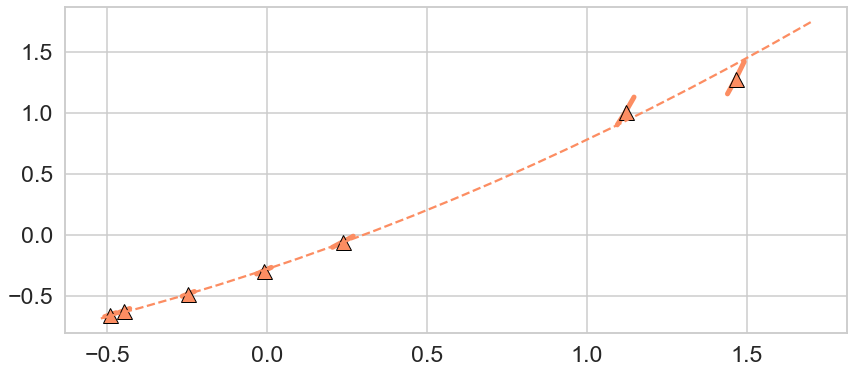

In [72]:
fig, ax = plt.subplots()

label = 'a0099'
for level in [0, 1]:
    for frame in ['P000', 'P001', 'P011', 'P111', 'P002']:
        dat = raw_data.get(label).get(f'{frame}_{level}', False)
        if not dat: continue
        ax.plot(conv_x(dat.get('xys')[:,0]), conv_y(dat.get('xys')[:,1]), lw=5, marker='', ms=25, color='C1')
        ax.plot(conv_x(dat.get('xy')[0]), conv_y(dat.get('xy')[1]), marker='^', ms=15, mec='black', color='C1')

dat = raw_data.get(label).get('ere')
ax.plot(conv_x(dat[:,0]), conv_y(dat[:,1]), color='C1', ls='--')
#ax.set(xlim=(0.2, 1.55), ylim=(-0.2, 1.5))

In [75]:
raw_data_a0076 = {
    'P001_1': {
        'xy': np.array([226.471, 57.718]),
        'xys': np.array([
            [225.52, 61.7],
            [227.36, 53.77],
            [227.42, 53.48]
        ])
    },
    'P000_1': {
        'xy': np.array([191.9265, 88.538]),
        'xys': np.array([
            [191.03, 91.06],
            [192.82, 85.88]
        ])
    },
    'P111_0': {
        'xy': np.array([121.723, 139.084]),
        'xys': np.array([
            [120.46, 140.25],
            [122.99, 137.88]
        ])
    },
    'P011_0': {
        'xy': np.array([101.3467, 150.237]),
        'xys': np.array([
            [100.44, 150.97],
            [102.25, 149.49]
        ])
    },
    'P001_0': {
        'xy': np.array([79.9539, 160.286]),
        'xys': np.array([
            [79.25, 160.79],
            [80.65, 159.78]
        ])
    },
    'P002_0': {
        'xy': np.array([58.7545, 169.011]),
        'xys': np.array([
            [58.14, 169.41],
            [59.37, 168.6]
        ])
    },
    'P000_0': {
        'xy': np.array([57.2036, 169.528]),
        'xys': np.array([
            [56.6, 169.92],
            [57.81, 169.13]
        ])
    },
    'ere': np.array([
        [41.62, 173.88],
        [49.78, 171.45],
        [57.95, 168.76],
        [66.12, 165.82],
        [74.29, 162.63],
        [82.46, 159.18],
        [90.63, 155.49],
        [98.79, 151.54],
        [106.96, 147.35],
        [115.13, 142.9],
        [123.3, 138.21],
        [131.47, 133.26],
        [139.63, 128.06],
        [147.8, 122.61],
        [155.97, 116.91],
        [164.14, 110.96],
        [172.31, 104.75],
        [180.48, 98.3],
        [189.67, 90.74],
        [198.85, 82.86],
        [208.04, 74.66],
        [217.23, 66.15],
        [226.42, 57.31],
        [235.61, 48.16],
        [244.8, 38.7]
    ])
}

In [76]:
raw_data = {'a0099': raw_data_a0099, 'a0076': raw_data_a0076}

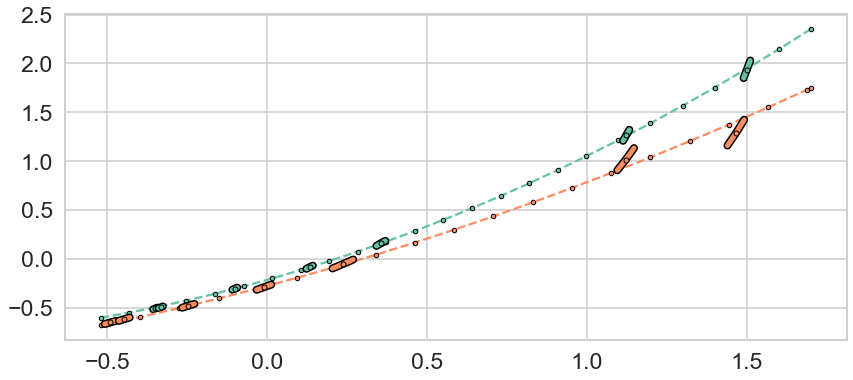

In [88]:
fig, ax = plt.subplots()

for i, label in enumerate(['a0076', 'a0099']):
    dat = raw_data.get(label).get('ere')
    ax.plot(conv_x(dat[:,0]), conv_y(dat[:,1]), marker='.', mec='black', color=f'C{i}', ls='--')

    for level in [0, 1]:
        for frame in ['P000', 'P001', 'P011', 'P111', 'P002']:
            dat = raw_data.get(label).get(f'{frame}_{level}', False)
            if not dat: continue
            ax.plot(conv_x(dat.get('xys')[:,0]), conv_y(dat.get('xys')[:,1]), lw=8, color='black')
            ax.plot(conv_x(dat.get('xys')[:,0]), conv_y(dat.get('xys')[:,1]), lw=5, marker='', ms=25, color=f'C{i}')
            ax.plot(conv_x(dat.get('xy')[0]), conv_y(dat.get('xy')[1]), marker='o', ms=5, mec='black', color=f'C{i}')

#ax.set(xlim=(0.2, 1.55), ylim=(-0.2, 1.5))

[(-0.5, 0.5), (-0.8, 0.5)]

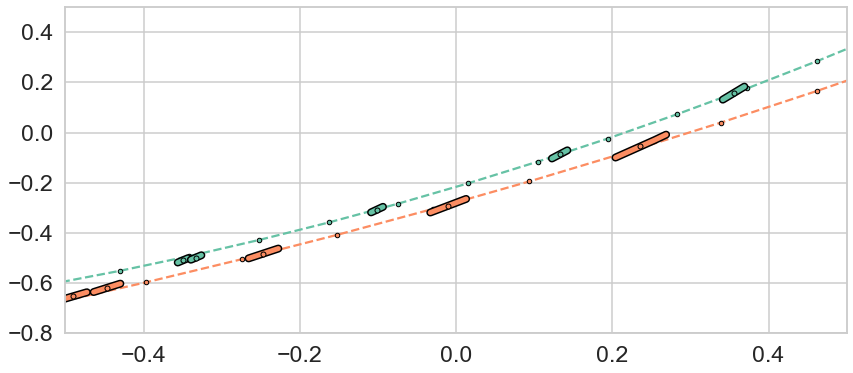

In [91]:
fig, ax = plt.subplots()

for i, label in enumerate(['a0076', 'a0099']):
    dat = raw_data.get(label).get('ere')
    ax.plot(conv_x(dat[:,0]), conv_y(dat[:,1]), marker='.', mec='black', color=f'C{i}', ls='--')

    for level in [0, 1]:
        for frame in ['P000', 'P001', 'P011', 'P111', 'P002']:
            dat = raw_data.get(label).get(f'{frame}_{level}', False)
            if not dat: continue
            ax.plot(conv_x(dat.get('xys')[:,0]), conv_y(dat.get('xys')[:,1]), lw=8, color='black')
            ax.plot(conv_x(dat.get('xys')[:,0]), conv_y(dat.get('xys')[:,1]), lw=5, marker='', ms=25, color=f'C{i}')
            ax.plot(conv_x(dat.get('xy')[0]), conv_y(dat.get('xy')[1]), marker='o', ms=5, mec='black', color=f'C{i}')

ax.set(xlim=(-0.5, 0.5), ylim=(-0.8, 0.5))